In [1]:
import seaborn as sns
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from helper_functions import preprocess_img,img_flip,img_change_brightness,load_img

% matplotlib inline

CSV_PATH = "data/driving_log.csv"
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
IMAGE_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

np.random.seed(0)

Loading csv into pandas dataframe to view steering data

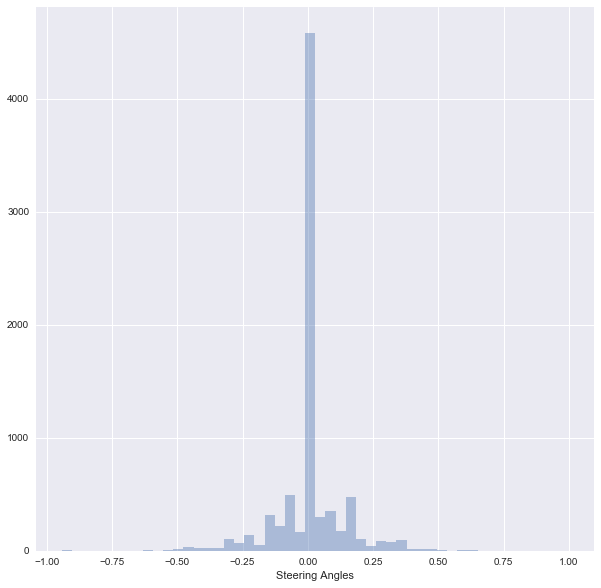

In [2]:
data_df = pd.read_csv(CSV_PATH)
data_Series = data_df.loc[:, 'steering']
sns.set(rc={"figure.figsize": (10, 10)})
sns.distplot(data_Series, kde=False, axlabel="Steering Angles")

As can be seen in the plot above the model has a huge bias towards a zero steering angle

Function to plot multiple images

In [3]:
import matplotlib.gridspec as gridspec

def plot_random_signs(n_rows,n_cols,X,y):
    plt.figure(figsize = (11,8))
    grid1 = gridspec.GridSpec(n_rows,n_cols)
    grid1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_rows*n_cols):
        
        ax = plt.subplot(grid1[i])  #subplot on index of gridspec
        ax.set_xticklabels([])      #sets the ticks on the x labels, have [] means there are no lables on ticks
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        
        index = np.random.randint(0,len(y)-1)
        plt.imshow(X[index])
        plt.axis('off')
    plt.show()

In [4]:
def load_data(csv_path):
    data_df = pd.read_csv(csv_path)
    X = data_df.loc[:, ('center', 'left', 'right')].values
    y = data_df.loc[:, 'steering'].values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)
    return X_train, X_valid, y_train, y_valid, data_df

In [5]:
X_train, X_valid, y_train, y_valid, data_df = load_data(CSV_PATH)

In [7]:
images=[]
for i in range(0,3):
    img= load_img(X_train[0,i])
    images.append(img)

In [8]:
plt.imshow(images[0])
plt.show()